### Aim: Denoising of images using Autoencoder.

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras import layers
import warnings
warnings.filterwarnings("ignore")

In [2]:
(x_train,_),(x_test,_) = mnist.load_data()

In [3]:
x_train = x_train.astype("float")/255
x_test = x_test.astype("float")/255

In [4]:
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


In [5]:
x_train = np.reshape(x_train, (len(x_train),28,28,1))
x_test = np.reshape(x_test, (len(x_test),28,28,1))

In [6]:
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [7]:
# Generating noisy images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size = x_test.shape)

x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)

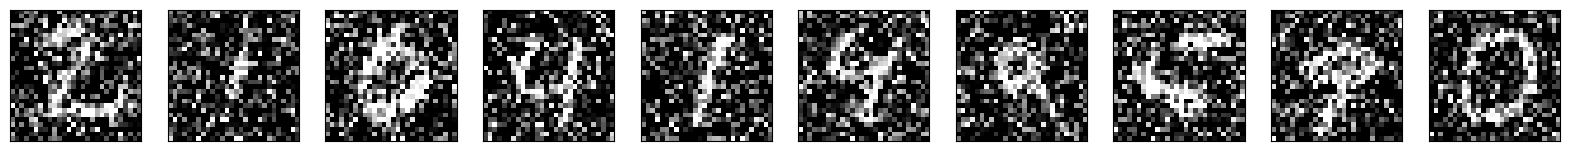

In [8]:
n = 10
plt.figure(figsize=(20,2))
for i in range(1, n+1):
  ax = plt.subplot(1,n,i)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [9]:
input_img = keras.Input(shape=(28,28,1))
x = layers.Conv2D(32,(3,3),activation="relu", padding="same")(input_img)
x = layers.MaxPooling2D((2,2), padding="same")(x)
x = layers.Conv2D(32,(3,3), activation="relu", padding="same")(x)

encoded = layers.MaxPooling2D((2,2),padding="same")(x)
x = layers.Conv2D(32,(3,3), activation="relu", padding="same")(encoded)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(32,(3,3), activation="relu", padding="same")(x)
x = layers.UpSampling2D((2,2))(x)

decoded = layers.Conv2D(1,(3,3), activation="sigmoid", padding="same")(x)

In [10]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(loss="binary_crossentropy", optimizer="adam")

In [11]:
autoencoder.fit(x_train_noisy, x_train, epochs = 3, batch_size = 128, validation_data=(x_test_noisy, x_test))

Epoch 1/3
469/469 [==============================] - 211s 435ms/step - loss: 0.1661 - val_loss: 0.1171
Epoch 2/3
469/469 [==============================] - 197s 419ms/step - loss: 0.1136 - val_loss: 0.1088
Epoch 3/3
469/469 [==============================] - 191s 407ms/step - loss: 0.1081 - val_loss: 0.1056


In [12]:
predictions = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 9s 28ms/step


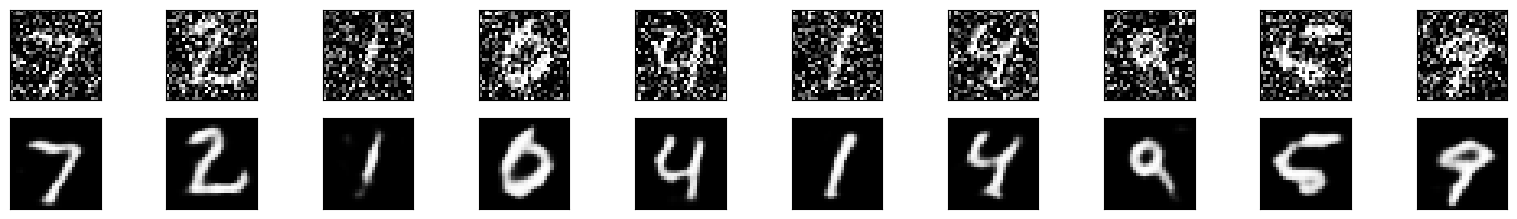

In [15]:
n=10
plt.figure(figsize=(40,4))
for i in range(10):
    ax=plt.subplot(3,20,i+1)
    plt.imshow(x_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax=plt.subplot(3,20,i+1+20)
    plt.imshow(predictions[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)